In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="whitegrid")

In [2]:
# Load the dataset
df = pd.read_csv("Fast Delivery Agent Reviews.csv")
df.head()

,Agent Name,Rating,Review Text,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
0,Zepto,4.5,Purpose boy job cup decision girl now get job ...,58,Delhi,Essentials,Neutral,High,Yes,Out of Stock,4,Incorrect
1,Zepto,2.1,Prevent production able both the box school wa...,25,Lucknow,Grocery,Negative,Low,No,Out of Stock,2,Correct
2,JioMart,4.5,Family station listen agreement more kitchen l...,54,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,3,Correct
3,JioMart,2.6,World north people area everything enter beyon...,22,Chennai,Essentials,Neutral,Low,Yes,In Stock,1,Incorrect
4,Zepto,3.6,Hand way yourself tax whether sister anyone ef...,34,Pune,Pharmacy,Positive,High,No,In Stock,2,Incorrect


In [3]:
# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Correct numeric types
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Standardize text columns
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.title()
    df[col] = df[col].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", x))

# Identify outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in Rating: 0
Outliers in Delivery Time (min): 0
Outliers in Customer Service Rating: 0


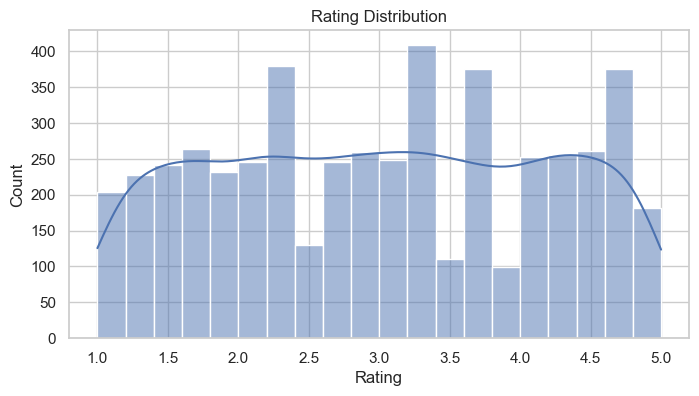

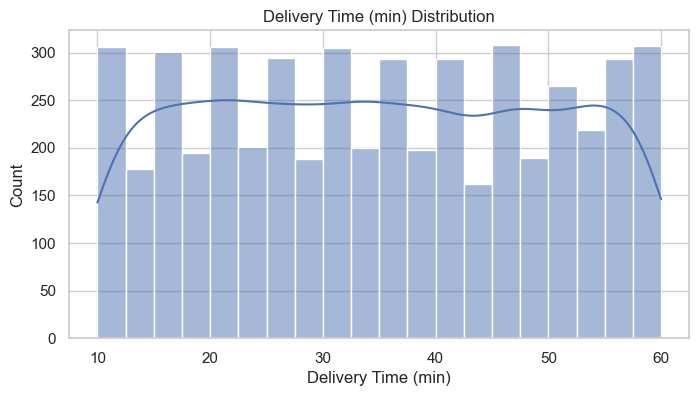

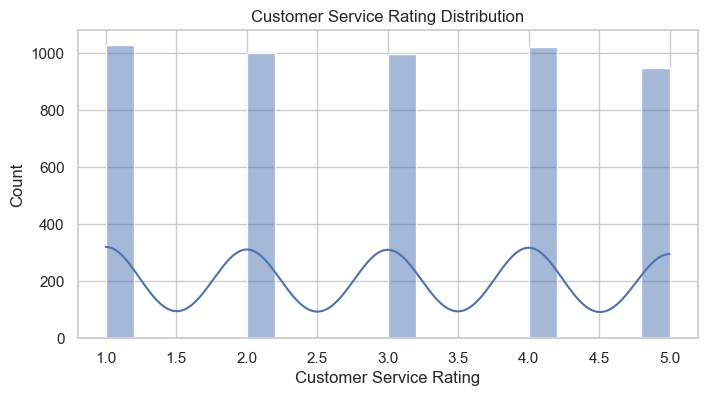

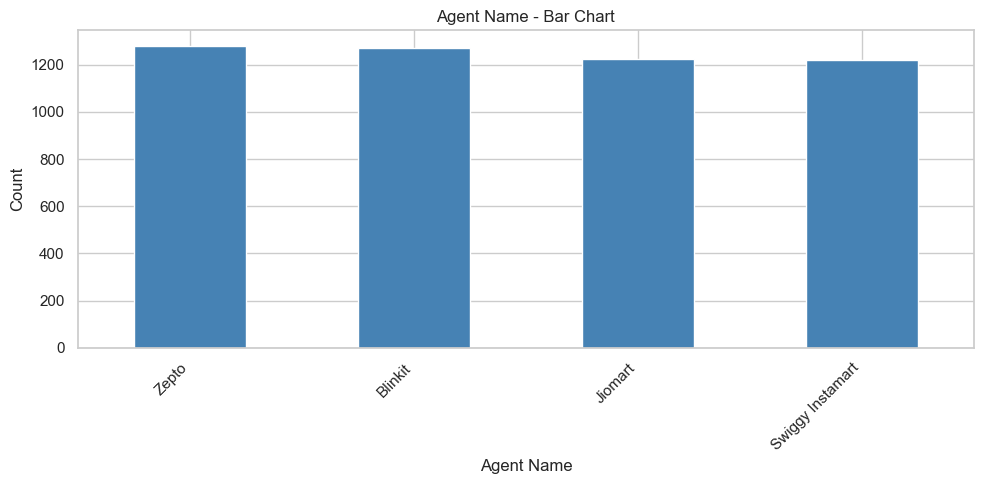

C:\Users\Asus\AppData\Local\Temp\ipykernel_10912\272748099.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


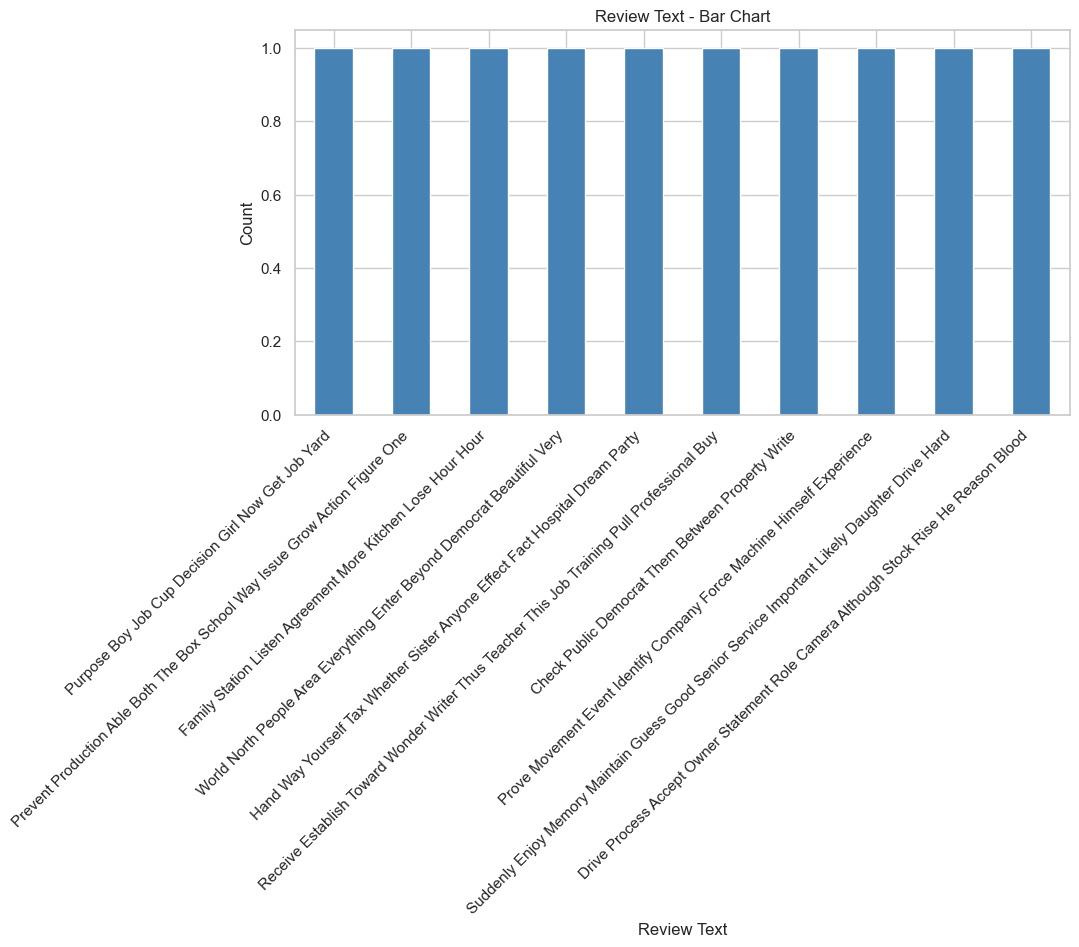

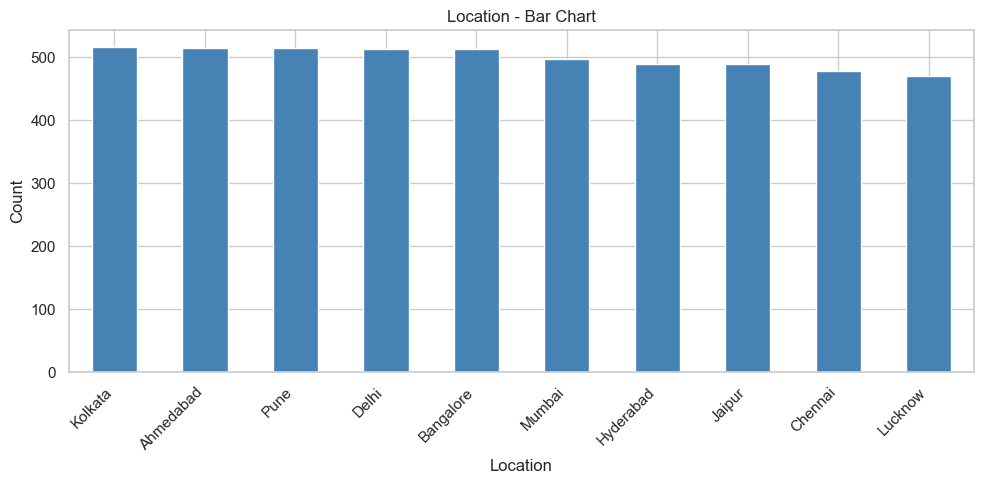

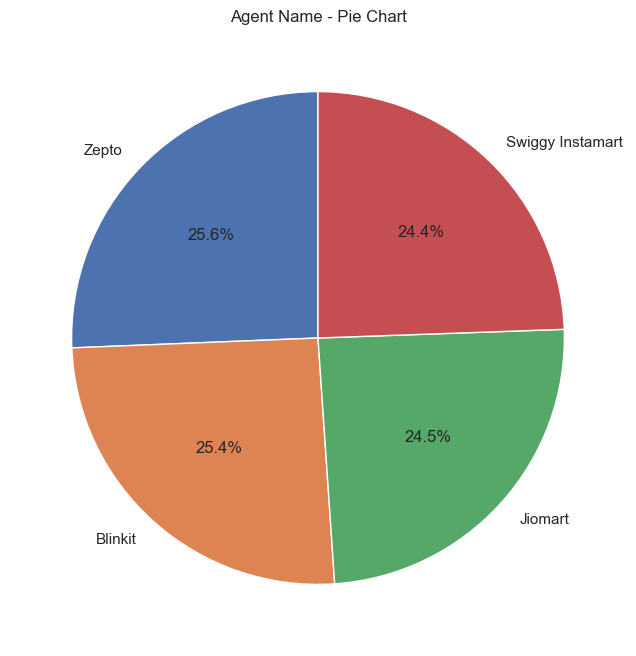

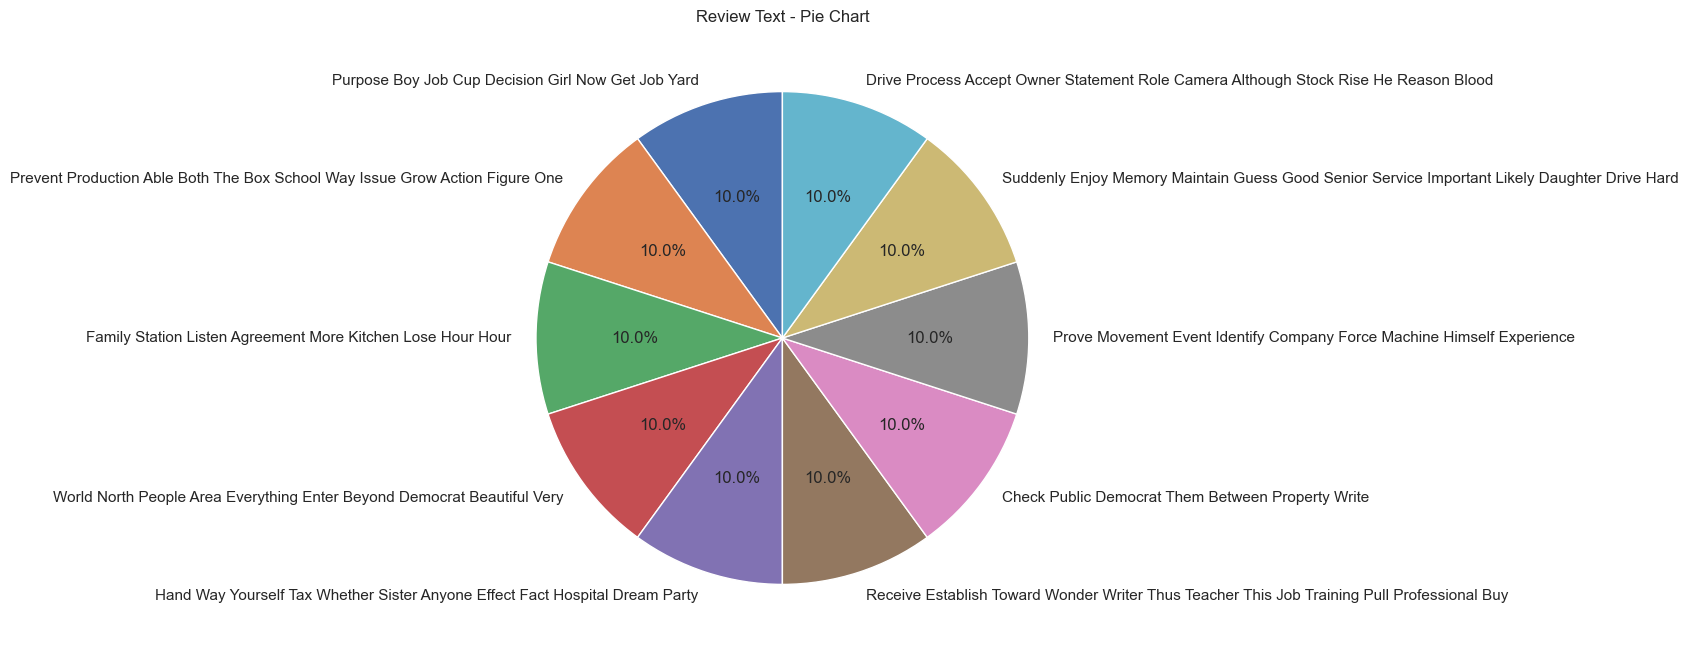

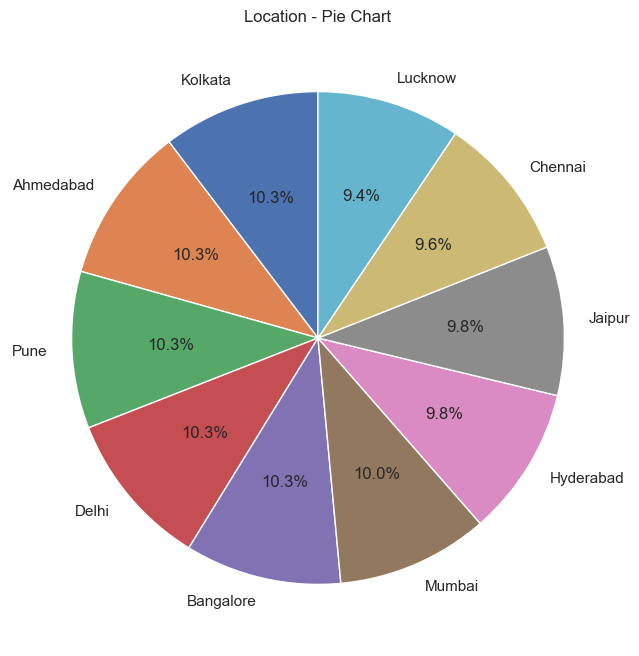

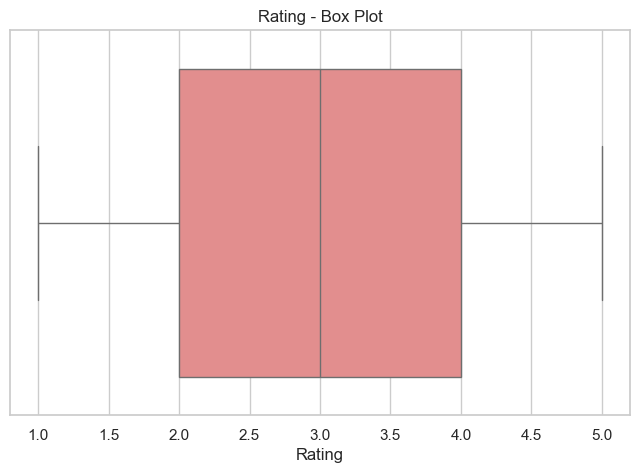

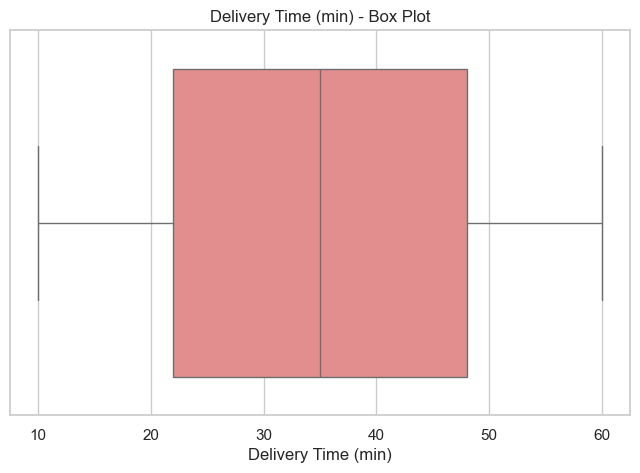

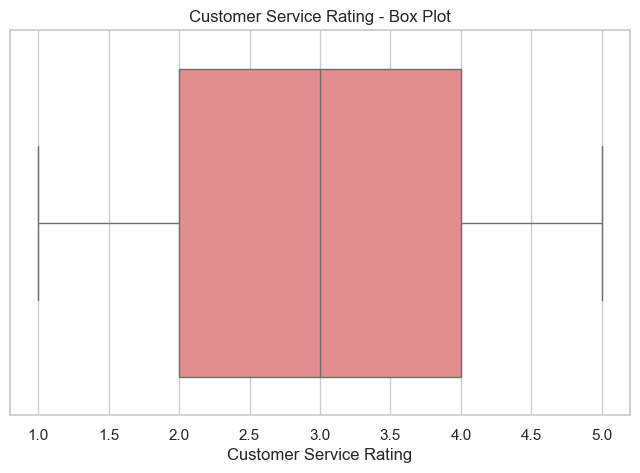

C:\Users\Asus\AppData\Local\Temp\ipykernel_10912\272748099.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().head(10).index, palette='viridis')


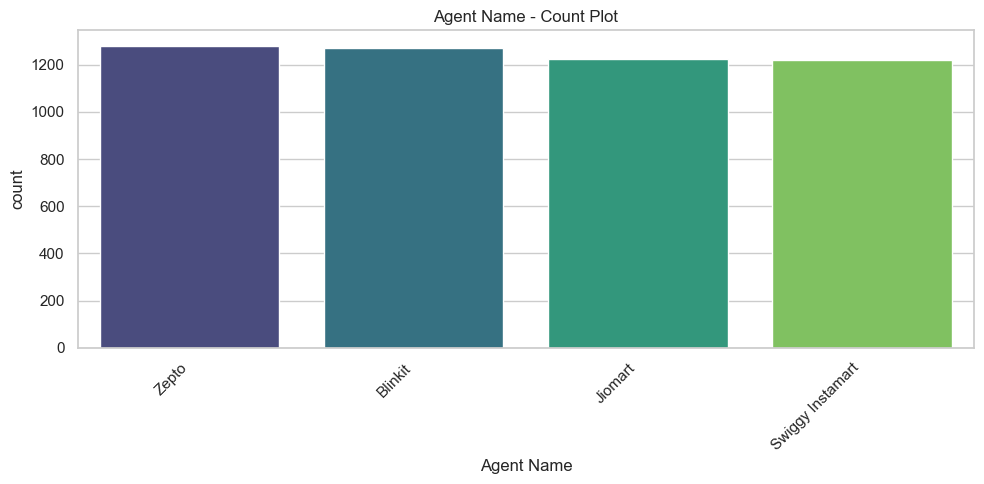

C:\Users\Asus\AppData\Local\Temp\ipykernel_10912\272748099.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().head(10).index, palette='viridis')
C:\Users\Asus\AppData\Local\Temp\ipykernel_10912\272748099.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\Asus\AppData\Local\Temp\ipykernel_10912\272748099.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


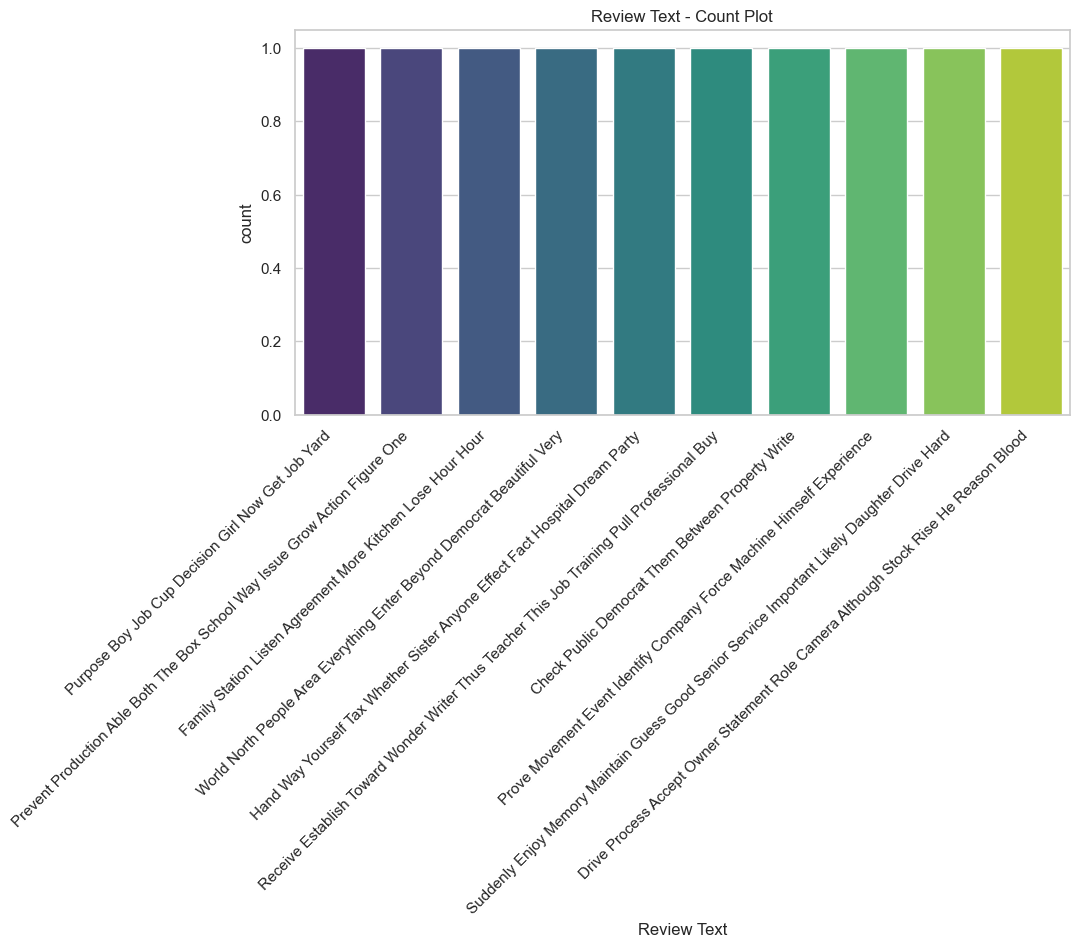

C:\Users\Asus\AppData\Local\Temp\ipykernel_10912\272748099.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().head(10).index, palette='viridis')


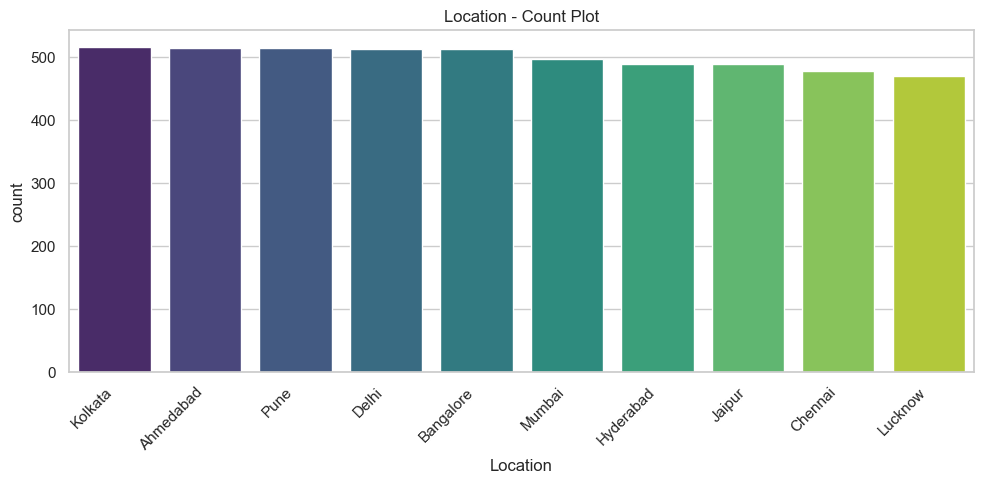

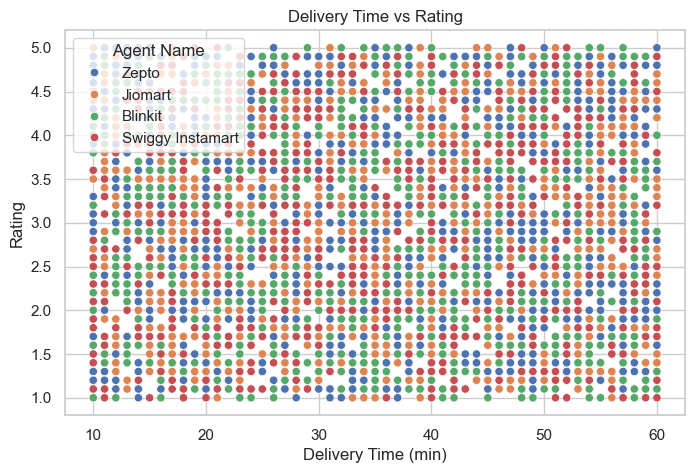

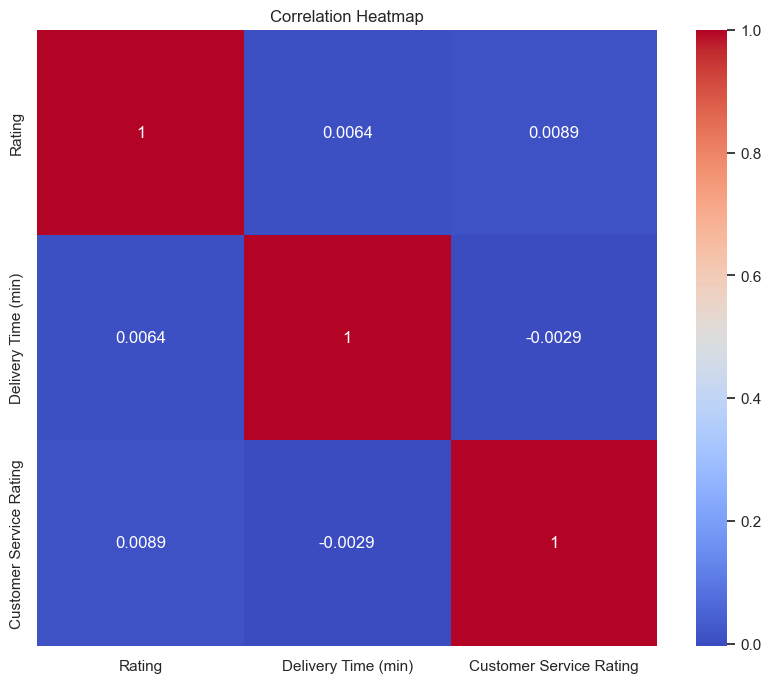

In [4]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

for col in categorical_cols[:3]:
    plt.figure(figsize=(10,5))
    df[col].value_counts().head(10).plot(kind='bar', color='steelblue')
    plt.title(f"{col} - Bar Chart")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for col in categorical_cols[:3]:
    plt.figure(figsize=(8,8))
    df[col].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f"{col} - Pie Chart")
    plt.ylabel("")
    plt.show()

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"{col} - Box Plot")
    plt.show()

for col in categorical_cols[:3]:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().head(10).index, palette='viridis')
    plt.title(f"{col} - Count Plot")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

if 'Delivery Time (min)' in df.columns and 'Rating' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x='Delivery Time (min)', y='Rating', hue='Agent Name')
    plt.title("Delivery Time vs Rating")
    plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [5]:
# Summary of missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# Numeric summary
print("\nNumeric Columns Summary:\n", df.describe())

# Top categories for categorical columns
for col in categorical_cols:
    print(f"\nTop values for {col}:\n", df[col].value_counts().head(5))


Missing Values per Column:
 Agent Name                 0
Rating                     0
Review Text                0
Delivery Time (min)        0
Location                   0
Order Type                 0
Customer Feedback Type     0
Price Range                0
Discount Applied           0
Product Availability       0
Customer Service Rating    0
Order Accuracy             0
dtype: int64

Numeric Columns Summary:
            Rating  Delivery Time (min)  Customer Service Rating
count  5000.00000          5000.000000              5000.000000
mean      3.00290            34.962400                 2.972000
std       1.15214            14.789656                 1.409969
min       1.00000            10.000000                 1.000000
25%       2.00000            22.000000                 2.000000
50%       3.00000            35.000000                 3.000000
75%       4.00000            48.000000                 4.000000
max       5.00000            60.000000                 5.000000

Top val

In [6]:
from openpyxl import Workbook
from openpyxl.drawing.image import Image
from io import BytesIO

with pd.ExcelWriter("Fast_Delivery_Analysis.xlsx", engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Cleaned Data', index=False)
    
    workbook = writer.book
    
    for col in numeric_cols:
        fig, ax = plt.subplots(figsize=(8,4))
        sns.histplot(df[col], bins=20, kde=True, ax=ax)
        ax.set_title(f"{col} Distribution")
        
        img_data = BytesIO()
        fig.savefig(img_data, format='png', bbox_inches='tight')
        img_data.seek(0)
        plt.close(fig)
        
        ws = workbook.create_sheet(f"{col[:25]} Histogram")
        img = Image(img_data)
        ws.add_image(img, 'A1')
    
    for idx, col in enumerate(categorical_cols[:3]):
        fig, ax = plt.subplots(figsize=(10,5))
        df[col].value_counts().head(10).plot(kind='bar', color='steelblue', ax=ax)
        ax.set_title(f"{col} - Bar Chart")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        
        img_data = BytesIO()
        fig.savefig(img_data, format='png', bbox_inches='tight')
        img_data.seek(0)
        plt.close(fig)
        
        ws = workbook.create_sheet(f"{col[:25]} Bar")
        img = Image(img_data)
        ws.add_image(img, 'A1')
    
    for idx, col in enumerate(categorical_cols[:3]):
        fig, ax = plt.subplots(figsize=(8,8))
        df[col].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax)
        ax.set_title(f"{col} - Pie Chart")
        ax.set_ylabel("")
        
        img_data = BytesIO()
        fig.savefig(img_data, format='png', bbox_inches='tight')
        img_data.seek(0)
        plt.close(fig)
        
        ws = workbook.create_sheet(f"{col[:25]} Pie")
        img = Image(img_data)
        ws.add_image(img, 'A1')
    
    for col in numeric_cols:
        fig, ax = plt.subplots(figsize=(8,5))
        sns.boxplot(x=df[col], color='lightcoral', ax=ax)
        ax.set_title(f"{col} - Box Plot")
        
        img_data = BytesIO()
        fig.savefig(img_data, format='png', bbox_inches='tight')
        img_data.seek(0)
        plt.close(fig)
        
        ws = workbook.create_sheet(f"{col[:25]} BoxPlot")
        img = Image(img_data)
        ws.add_image(img, 'A1')
    
    fig, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", ax=ax)
    ax.set_title("Correlation Heatmap")
    
    img_data = BytesIO()
    fig.savefig(img_data, format='png', bbox_inches='tight')
    img_data.seek(0)
    plt.close(fig)
    
    ws = workbook.create_sheet("Correlation Heatmap")
    img = Image(img_data)
    ws.add_image(img, 'A1')

print("Excel file 'Fast_Delivery_Analysis.xlsx' created with cleaned data and charts!")

C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
C:\Users\Asus\AppData\Local\Temp\ipykernel_10912\1492075323.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Excel file 'Fast_Delivery_Analysis.xlsx' created with cleaned data and charts!
